In [39]:
import sys
import os 

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [35]:
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
train = pd.read_csv('data/train.csv')

In [3]:
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


- id : 샘플 아이디
- Gender : 전복 성별
- Lenght : 전복 길이
- Diameter : 전복 둘레
- Height : 전복 키
- Whole Weight : 전복 전체 무게
- Shucked Weight : 껍질을 제외한 무게
- Viscra Weight : 내장 무게
- Shell Weight : 껍질 무게
- Target : 전복 나이

In [4]:
train.shape

(1253, 10)

In [12]:
# 결측치 확인
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print (f'결측치가 있는 컬럼은: {col}입니다')
            print (f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다')
            missing_col.append([col, dataframe[col].dtype])
        if counted_missing_col == 0:
            print('결측치가 존재하지 않습니다')
        return missing_col

In [13]:
for i, col in enumerate(train.columns):
    print (i, col)

0 id
1 Gender
2 Lenght
3 Diameter
4 Height
5 Whole Weight
6 Shucked Weight
7 Viscra Weight
8 Shell Weight
9 Target


In [14]:
sum(train['id'].isna())

0

In [16]:
missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


In [19]:
train.isnull().sum()

id                0
Gender            0
Lenght            0
Diameter          0
Height            0
Whole Weight      0
Shucked Weight    0
Viscra Weight     0
Shell Weight      0
Target            0
dtype: int64

In [20]:
# id 제거
train = train.drop(columns=['id'],axis=1)

In [22]:
# target 분포 확인
temp = train['Target'].unique()
np.sort(temp) # 오름차순 정렬

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29])

In [29]:
train.groupby('Target').count().iloc[:,0]

Target
3       5
4      14
5      37
6      88
7     107
8     174
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

그림 저장: Abalone age by count


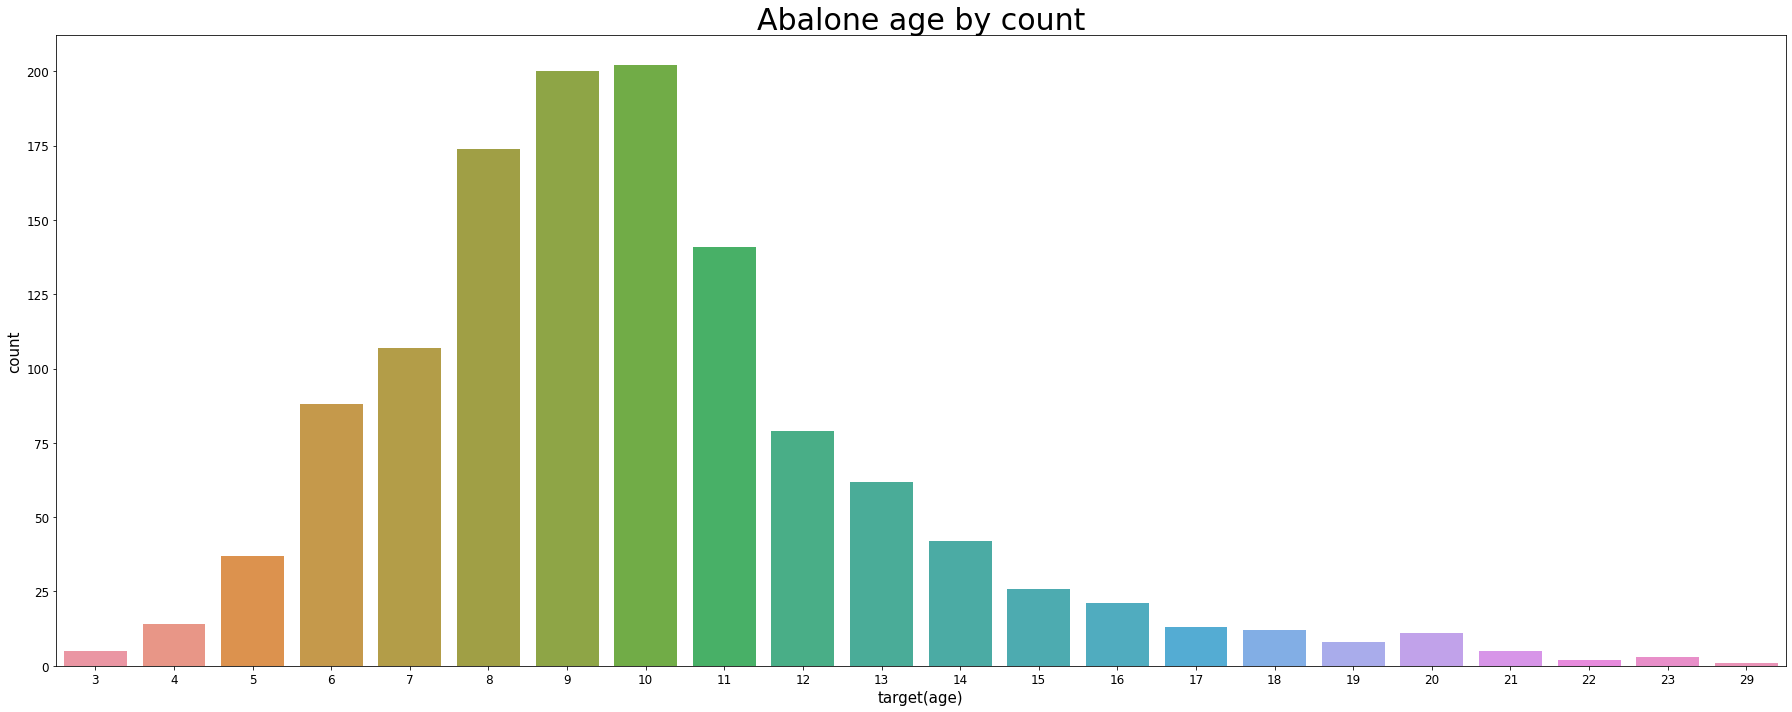

In [41]:
fig, ax = plt.subplots(1, figsize=(25,10))
sns.countplot('Target', data=train)
plt.title("Abalone age by count", fontsize=30)
plt.xlabel("target(age)", fontsize=15)
plt.ylabel("count", fontsize=15)
save_fig("Abalone age by count")
plt.show();

In [43]:
# 데이터 기초 통계 분석
# 카테고리형 데이터
# 'Gender' 시각화
train['Gender'].unique()

array(['M', 'I', 'F'], dtype=object)

In [45]:
train.groupby('Gender').count().iloc[:,0]

Gender
F    380
I    404
M    469
Name: Lenght, dtype: int64

그림 저장: Abalone gender by count


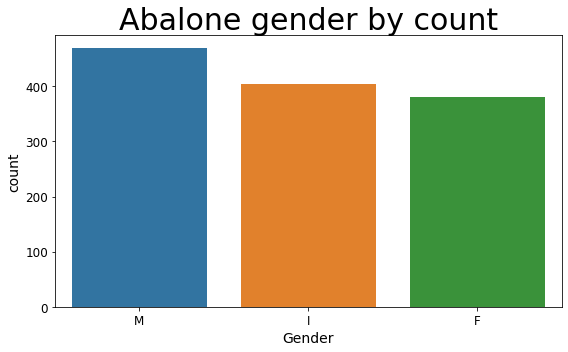

In [48]:
plt.figure(figsize=(8,5))
sns.countplot('Gender', data=train)
plt.title("Abalone gender by count", fontsize=30)
save_fig("Abalone gender by count")
plt.show();